In [19]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, xlabel, ylabel, xlim, ylim, title, grid, legend, show
from IPython.display import Image,display
import warnings
warnings.filterwarnings('ignore')
from gaussxw import gaussxwab

## Ejercicio 7: campo eléctrico generado por una distribución de carga

Supongamos que tenemos una distribución de cargas y queremos calcular el campo eléctrico resultante.

Una forma de hacerlo es calcular primero el potencial eléctrico φ y luego tomar su gradiente. Para una carga puntual q en el origen, el potencial eléctrico a una distancia r del origen es $φ = q/4π\epsilon_0r$ y el campo eléctrico es E = -∇ φ.

---

1. Se tienen dos cargas, de $±1 C$, separadas $10$ cm. Calcula el potencial eléctrico resultante en un plano cuadrado de $1 m × 1 m$ que rodea las cargas y las atraviesa. Calcula en el potencial en puntos espaciados de $1$ cm en una cuadrícula y haz una visualización en la pantalla del potencial mediante un gráfico de densidad.

---

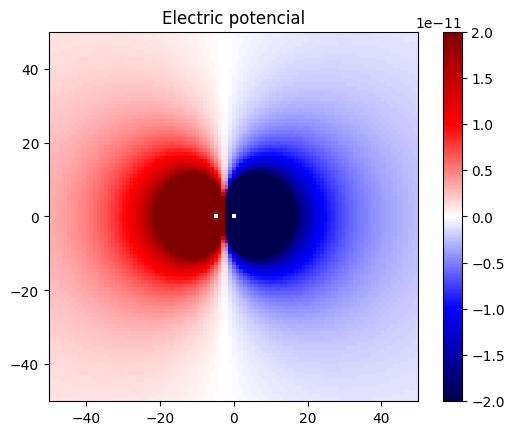

In [20]:
y1, x1 = -5, 0
y2, y2 = 5, 0
q1, q2 =1, -1


x = np.linspace(-50,50,101)  
y = np.linspace(-50,50,101)
X, Y = np.meshgrid(x, y)  

q=1.602176634e-19
e0=8.854187817e-12
K=q/(4*np.pi*e0)

R1 = np.sqrt((Y - x1)**2 + (X - y1)**2)
R2 = np.sqrt((Y - y2)**2 + (X - y2)**2) 

P = K*(q1/R1 + q2/R2)

plt.imshow(P, origin = "lower", cmap = "seismic", extent = (-50, 50, -50, 50), vmax = 2e-11, vmin = -2e-11)
plt.title("Electric potencial")
plt.colorbar()
show()

2.  Calcule ahora las derivadas parciales del potencial con respecto a $x$ e $y$ y, por tanto, encuentre el campo eléctrico en el plano $xy$. Haz también una visualización del campo. Esto es un poco más complicado que la visualización del potencial, porque el campo eléctrico tiene tanto magnitud como dirección. Una forma de hacerlo podría ser hacer dos gráficos de densidad, uno para la magnitud y otro para la dirección, este último utilizando el esquema de color "hsv" en pylab, que es un esquema de arco iris que pasa por todos los colores, pero comienza y termina con el mismo tono de rojo, lo que lo hace adecuado para representar cosas como direcciones o ángulos que van alrededor del círculo completo y terminan donde comenzaron. Una visualización más sofisticada podría utilizar la función quiver de pylab, dibujando una cuadrícula de flechas con dirección y longitud elegidas para representar el campo.

---

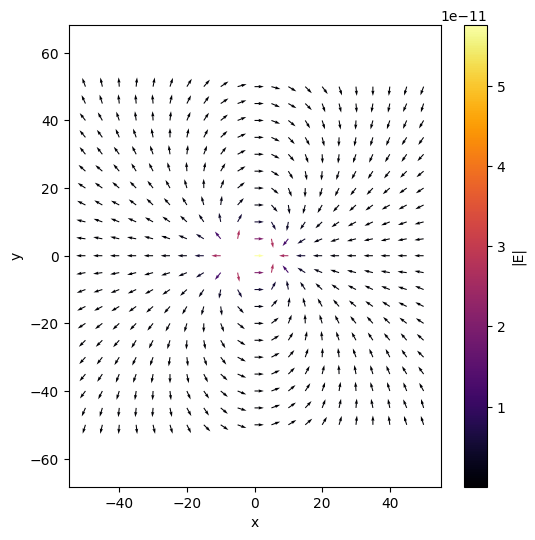

In [21]:
x1, y1, q1 = -5, 0, 1
x2, y2, q2 = 5, 0, -1

def pot(X, Y, y1, x1, q1, y2, x2, q2): 
    q = 1.602176634e-19
    e0 = 8.854187817e-12
    K = q/(4*np.pi*e0)

    R1 = np.sqrt((X - x1)**2 + (Y - y1)**2)
    R2 = np.sqrt((X - x2)**2 + (Y - y2)**2)
    
    P = K*((q1/R1) + (q2/R2))
    return P
N=21
x = np.linspace(-50,50,N)  
y = np.linspace(-50,50,N)
X, Y = np.meshgrid(x,y)

h = 5e-13

Ex = np.empty([N,N])
m = 0
for i in x:
    n = 0
    for j in y:
        Ex[n][m] = (pot(i+h, j, y1, x1, q1, y2, x2, q2) - pot(i, j, y1, x1, q1, y2, x2, q2))/(2*h)
        n += 1
    m += 1

Ey = np.empty([N,N])
m = 0
for i in x:
    n = 0
    for j in y: 
        Ey[n][m] = (pot(i, j+h, y1, x1, q1, y2, x2, q2) - pot(i, j, y1, x1, q1, y2, x2, q2))/(2*h)
        n += 1
    m += 1

E = np.sqrt(Ex**2+Ey**2)
u = -Ex/E
v = -Ey/E

plt.figure(figsize=(6,6))
plt.quiver(X, Y, u, v, E, scale=40, cmap='inferno')
plt.colorbar(label='|E|')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

3. Supongamos ahora que se tiene una distribución continua de carga sobre un cuadrado $L × L$. La densidad de carga en $cm^{-2}$ es

    $$\sigma(x,y)=q_0\sin\frac{2\pi x}{L}\sin\frac{2\pi y}{L}$$

    Calcule y visualice el campo eléctrico resultante en puntos espaciados 1 cm en 1 metro cuadrado del plano $xy$ para el caso en que L = 10 cm, la distribución de carga está centrada en el centro del área visualizada, y $q_0 = 100$ $cm^{-2}$. Tendrás que realizar una doble integral sobre $x$ e $y$, luego diferenciar el potencial con respecto a la posición para obtener el campo eléctrico. Elige cualquier método de integración que te parezca apropiado para las integrales.

---

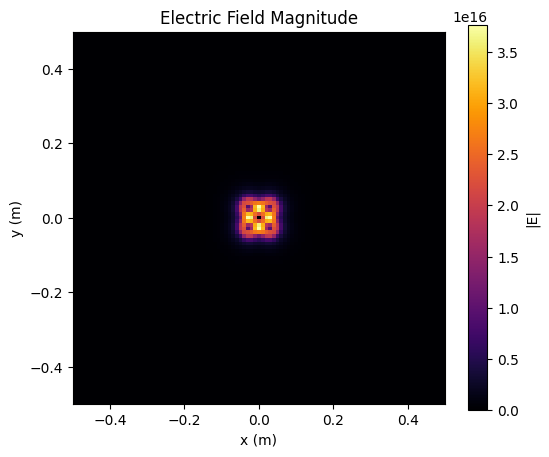

In [22]:
eps0 = 8.854187817e-12
k = 1/(4*np.pi*eps0)

L = 0.10        
q0 = 100 * 1e4  

dx = 0.01
x = np.arange(-0.5, 0.5+dx, dx)
y = np.arange(-0.5, 0.5+dx, dx)
X, Y = np.meshgrid(x, y)


Nsrc = 50
xs = np.linspace(-L/2, L/2, Nsrc)
ys = np.linspace(-L/2, L/2, Nsrc)
Xs, Ys = np.meshgrid(xs, ys)

dxs = xs[1] - xs[0]
dys = ys[1] - ys[0]

sigma = q0 * np.sin(2*np.pi*Xs/L) * np.sin(2*np.pi*Ys/L)

V = np.zeros_like(X)

for i in range(len(xs)):
    for j in range(len(ys)):
        R = np.sqrt((X - Xs[j, i])**2 + (Y - Ys[j, i])**2)
        R[R == 0] = np.inf 
        V += sigma[j, i] / R

V *= k * dxs * dys

Ex, Ey = np.gradient(-V, dx, dx)

E = np.sqrt(Ex**2 + Ey**2)

plt.figure(figsize=(6,5))
plt.imshow(E, extent = [-0.5,0.5,-0.5,0.5],
           origin = 'lower', cmap = 'inferno')
plt.colorbar(label = '|E|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Electric Field Magnitude')
plt.show()


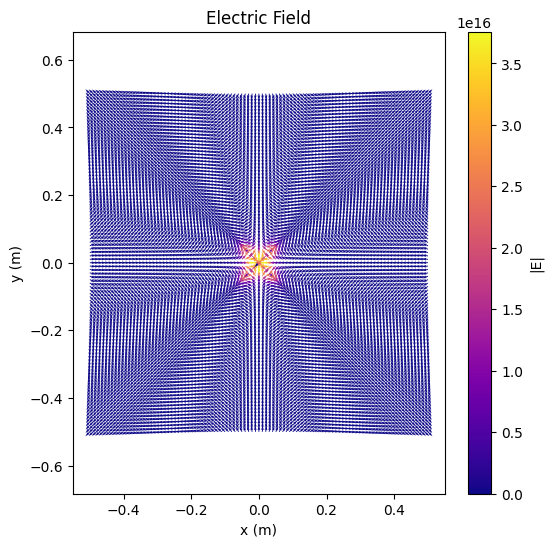

In [23]:
plt.figure(figsize = (6,6))
plt.quiver(X, Y, Ex/E, Ey/E, E, scale=60, cmap='plasma')
plt.colorbar(label = '|E|')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.axis('equal')
plt.title('Electric Field')
plt.show()